In [ ]:
import numpy as np
import tensorflow as tf

In physics, this example could be: classify a particle that has eta > 0 or not

In [ ]:
# Two classes of points in a 2D plane
# Generate each class of points by drawing their coordinates from a random distribution with a specific covariance matrix and a specific mean
# Intuitively, the covariance matrix describes the shape of the point cloud, and the mean describes its position in the plane
# We’ll reuse the same covariance matrix for both point clouds, but we’ll use two different mean values—the point clouds will have the same shape,
# but different positions.

In [ ]:
num_samples_per_class = 10000

positive_samples = np.random.multivariate_normal( mean = [0,2],
                                                cov = [[0.5,-1],[-0.5,-0.5]],
                                                size=num_samples_per_class)
print("Positive sample: ", positive_samples)

negative_samples = np.random.multivariate_normal( mean = [-1,0],
                                                cov = [[0.5,-1],[-0.5,-0.5]],
                                                size=num_samples_per_class)

print("Negative sample: ", negative_samples)

Positive sample:  [[-0.42286486  0.93059451]
 [ 0.15826741  2.36401582]
 [-0.16049539  2.14641966]
 ...
 [ 1.05328648  1.54949699]
 [-0.67850293 -0.77521543]
 [-0.57926307  1.0203486 ]]
Negative sample:  [[-1.07329404 -0.17916885]
 [-2.02454426 -0.6334489 ]
 [ 0.06046607 -1.47476611]
 ...
 [-2.17762505 -0.32333244]
 [-0.67018658  0.95233686]
 [-2.08950644  1.82877385]]


<ipython-input-4-b89e9c483eee>:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  positive_samples = np.random.multivariate_normal( mean = [0,2],
<ipython-input-4-b89e9c483eee>:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  negative_samples = np.random.multivariate_normal( mean = [-1,0],


In [ ]:
# Stack them together
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs)

[[-1.073294   -0.17916885]
 [-2.0245442  -0.6334489 ]
 [ 0.06046607 -1.4747661 ]
 ...
 [ 1.0532864   1.549497  ]
 [-0.6785029  -0.77521545]
 [-0.5792631   1.0203485 ]]


In [ ]:
# generate the corresponding target labels, an array of zeros and ones of shape (2000, 1),
# where targets[i, 0] is 0 if inputs[i] belongs to class 0 (and inversely).

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), # -> 0 if inputs[i] belongs to class 0
                     np.ones((num_samples_per_class, 1), dtype="float32"))) # -> 1 if inputs[i] belongs to class 1

print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
print(inputs[:, 0]) # Colonna 0
print(inputs[:, 1]) # Colonna 1
print(targets[:, 0]) # print the targets

[-1.073294   -2.0245442   0.06046607 ...  1.0532864  -0.6785029
 -0.5792631 ]
[-0.17916885 -0.6334489  -1.4747661  ...  1.549497   -0.77521545
  1.0203485 ]
[0. 0. 0. ... 1. 1. 1.]


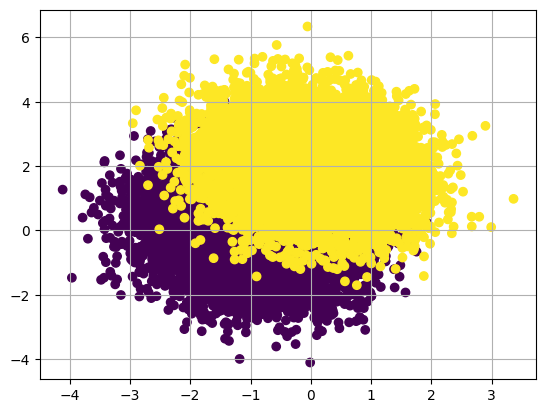

In [ ]:
# Plot the sample

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(inputs[:, 0], inputs[:, 1], c =targets[:, 0]) # c: array-like or list of color or color, optional

ax.grid(True)

plt.show()

In [ ]:
# Create a linear classifier that can learn to separate these two blobs.
# A linear classifier is an affine transformation (prediction = W • input + b) trained to minimize
# the square of the difference between predictions and the targets.

input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) # -> The inputs will be 2D points

b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,))) # -> Outputs will be a single score depending if the input belongs to class 0 or 1


In [ ]:
# Since the linear classifier operates on 2D inputs, W is really just two scalar coefficients
# w1 and w2: W = [[w1], [w2]]. Meanwhile, b is a single scalar coefficient.
# As such, for a given input point [x, y], its prediction value is prediction = [[w1], [w2]] • [x, y] + b = w1 * x + w2 * y + b.

def model(inputs):
    return tf.matmul(inputs, W) + b # -> Multiplies matrix a by matrix b, producing a * b.



In [ ]:
# The loss function will be

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)  # -> tensor with the same shape as targets and predictions, containing per-sample loss scores.
    return tf.reduce_mean(per_sample_losses)  # -> average these per-sample loss scores into a single scalar loss value: this is what reduce_mean does.

In [ ]:
# Next is the training step, which receives some training data and updates the weights W and b so as to minimize the loss on the data.

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:                       # Forward pass, inside a gradient tape scope
        predictions = model(inputs)                       # Forward pass, inside a gradient tape scope
        loss = square_loss(targets, predictions)          # Forward pass, inside a gradient tape scope
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])   # Retrieve the gradient of the loss with regard to weig
    W.assign_sub(grad_loss_wrt_W * learning_rate)            # Update the weights.
    b.assign_sub(grad_loss_wrt_b * learning_rate)            # Update the weights.
    return loss

In [ ]:
#  we’ll run each training step (gradient computation and weight update) for all the data

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.8973
Loss at step 1: 0.5263
Loss at step 2: 0.3289
Loss at step 3: 0.2236
Loss at step 4: 0.1674
Loss at step 5: 0.1374
Loss at step 6: 0.1213
Loss at step 7: 0.1127
Loss at step 8: 0.1080
Loss at step 9: 0.1055
Loss at step 10: 0.1041
Loss at step 11: 0.1033
Loss at step 12: 0.1029
Loss at step 13: 0.1026
Loss at step 14: 0.1025
Loss at step 15: 0.1024
Loss at step 16: 0.1023
Loss at step 17: 0.1022
Loss at step 18: 0.1022
Loss at step 19: 0.1022
Loss at step 20: 0.1021
Loss at step 21: 0.1021
Loss at step 22: 0.1021
Loss at step 23: 0.1021
Loss at step 24: 0.1021
Loss at step 25: 0.1021
Loss at step 26: 0.1021
Loss at step 27: 0.1021
Loss at step 28: 0.1020
Loss at step 29: 0.1020
Loss at step 30: 0.1020
Loss at step 31: 0.1020
Loss at step 32: 0.1020
Loss at step 33: 0.1020
Loss at step 34: 0.1020
Loss at step 35: 0.1020
Loss at step 36: 0.1020
Loss at step 37: 0.1020
Loss at step 38: 0.1020
Loss at step 39: 0.1020


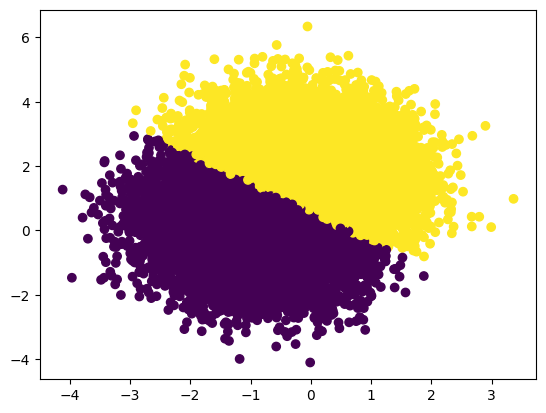

In [ ]:
 # Let’s plot how our linear model classifies the training data points.
 # Because our targets are zeros and ones, a given input point will be classified as “0” if its
 # prediction value is below 0.5, and as “1” if it is above 0.5

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

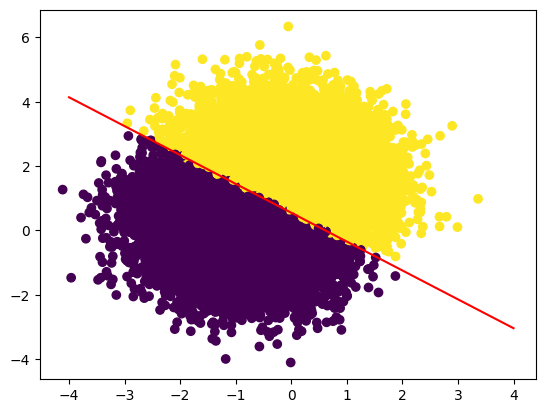

In [ ]:
# Let’s plot a line:

x = np.linspace(-4, 4, 100)  # Generate 100 regularly spaced numbers between –1 and 4, which we will use to plot our line.
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]      # This is our line’s equation
plt.plot(x, y, "-r")      # Plot our line ("-r" means “plot it as a red line”).
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) # Plot our model’s predictions on the same plot.

# **Now let's try this eta project**
We have a particle and we know that they have -2.5 < eta < 2.5 and we want to classify them according to their eta

In [ ]:
# Generate random data i.e. value between -2.5 < eta < 2.5
num_samples_per_class = 50
eta_inputs =  np.random.uniform(low=-2.5, high=2.5, size=(num_samples_per_class,))
print(eta_inputs)

[ 1.57527774 -0.02911603 -0.57698956 -1.42349483 -2.40439002  0.77747313
  0.78048201 -0.88430324 -2.25714226  0.23627269 -1.45849013 -1.34901749
  1.65909438  0.52983849  0.41524277  1.30935723 -0.74474316 -1.65783143
 -1.8911126  -0.96474864 -2.49769486  1.06823757 -1.01317379  1.76046021
  0.31467094 -0.35139407 -1.14371097  0.92504643  1.91026292 -1.5441273
 -2.15110042  1.83214536  1.92160932  0.49791182 -0.43181312  1.33443308
  2.15061032 -1.77999277  0.06146175  0.4104206  -2.27566707 -1.74307824
 -0.98615118 -0.73407579 -1.73516134 -0.39707512 -2.05704415  0.07249577
  2.48509726  0.48158141]


In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), # -> 0 if inputs[i] belongs to class 0
                     np.ones((num_samples_per_class, 1), dtype="float32"))) # -> 1 if inputs[i] belongs to class 1

print(targets)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
